In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv(r'train.csv')

In [4]:
test = pd.read_csv(r'test.csv')

In [5]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [6]:
print('Missing value check')
print(data.isnull().sum())
print(test.isnull().sum())

Missing value check
loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64
loan_id                     0
source                      0
financial_institution       0
interes

In [7]:
print(data.m13.value_counts())

0    115422
1       636
Name: m13, dtype: int64


### Exploratory Data Analysis

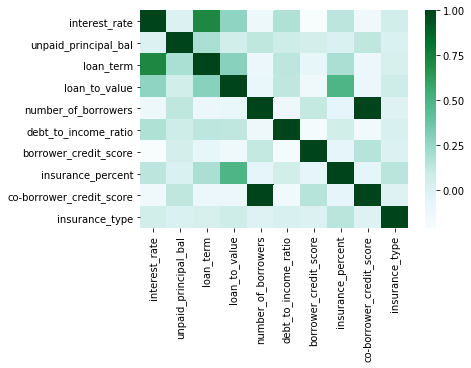

In [8]:
data_corr = data[['financial_institution','interest_rate','unpaid_principal_bal','loan_term','loan_to_value','number_of_borrowers','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score','insurance_type']]
sns.heatmap(data_corr.corr(), cmap='BuGn')

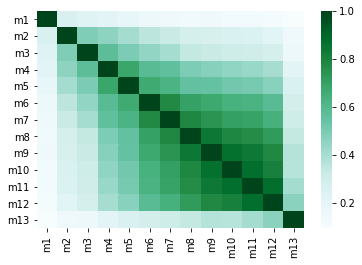

In [9]:
month_corr = data[['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','m13']]
sns.heatmap(month_corr.corr(), cmap='BuGn')

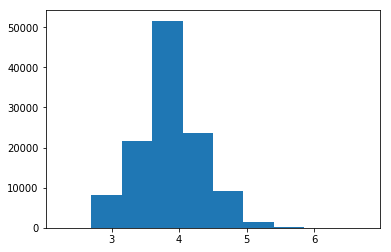

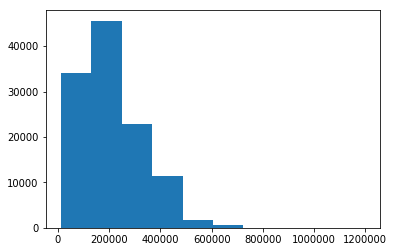

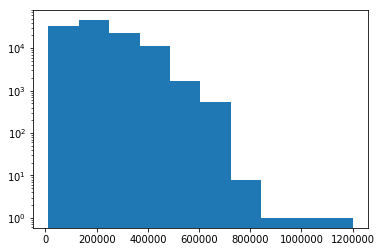

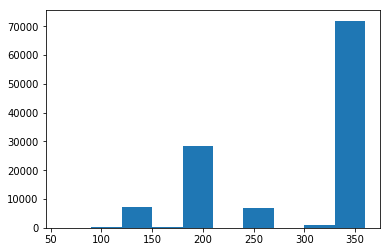

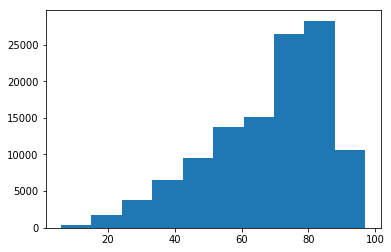

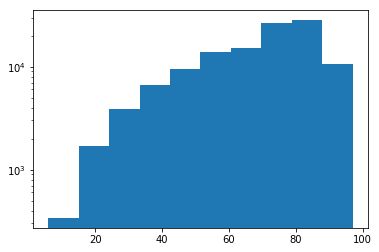

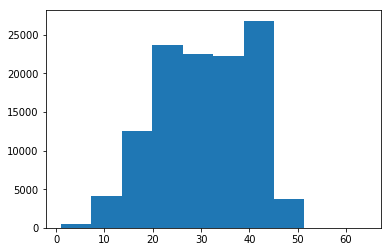

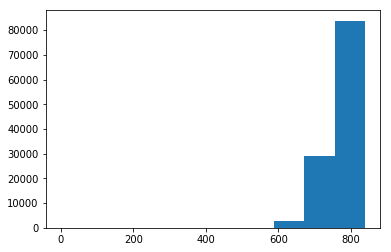

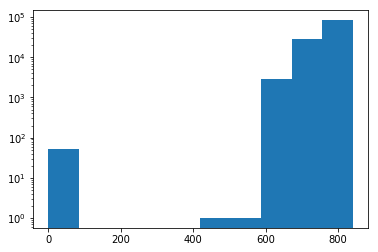

In [10]:
plt.hist(data['interest_rate'])
plt.show()
plt.hist(data['unpaid_principal_bal'])
plt.show()
plt.hist(data['unpaid_principal_bal'], log= True)
plt.show()
plt.hist(data['loan_term'])
plt.show()
plt.hist(data['loan_to_value'])
plt.show()
plt.hist(data['loan_to_value'], log = True)
plt.show()
plt.hist(data['debt_to_income_ratio'])
plt.show()
plt.hist(data['borrower_credit_score'])
plt.show()
plt.hist(data['borrower_credit_score'], log = True)
plt.show()

In [11]:
data['loan_to_value'] = data['loan_to_value'].apply(np.log)
data['unpaid_principal_bal'] = data['unpaid_principal_bal'].apply(np.log)

test['loan_to_value'] = test['loan_to_value'].apply(np.log)
test['unpaid_principal_bal'] = test['unpaid_principal_bal'].apply(np.log)

In [12]:
data_initial = data[['financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13']]

data_test = test[['financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']]

In [13]:
from sklearn.preprocessing import LabelEncoder

column_name = ['financial_institution','loan_purpose']
lb = {}
for x in column_name:
    lb[x] = LabelEncoder()
    
for x in column_name:
    lb[x].fit(data_initial[x])
    data_initial[x] = lb[x].transform(data_initial[x])
    data_test[x] = lb[x].transform(data_test[x])

C:\Users\prasu\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\prasu\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [14]:
X_train = data_initial.values[:,:-1]
Y_train = data_initial.values[:,-1]

In [15]:
from sklearn.preprocessing import StandardScaler
#
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler1.fit(X_train)
scaler2.fit(data_test)
initial_train = scaler1.transform(X_train)
initial_test = scaler2.transform(data_test)

C:\Users\prasu\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prasu\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test_test, Y_train, Y_test_test = train_test_split(initial_train, Y_train, test_size = 0.2, random_state = 42) 

In [ ]:
#param_distributions={'base_score':[0.3,0.4,0.5,0.6],
#                     'booster' : ['gbtree','gblinear','dart'],
#                     'colsample_bylevel': [0.3,0.5,0.6,0.7,0.8,0.9,1],
#                     'colsample_bynode': [0.4,0.5,0.6,0.7,0.8,0.9,1],
#                     'colsample_bytree': [0.4,0.5,0.6,0.7,0.8,0.9,1],
#                     'gamma' : [1,2,3,4,5,6,7],
#                     'learning_rate' : [0.01,0.1,0.2,0.3,0.4],
#                     'max_delta_step' : [0,2,4,6,8,10],
#                     'max_depth' : [4,6,8,10],
#                     'min_child_weight' : [1,2,3,4,5,6,7,8,9],
#                     'n_estimators' : [400,500,600],
#                     'objective' : ['binary:hinge']
#                     }
                     
#xgb_model = xgb.XGBClassifier(random_state = 42)
#rs = RandomizedSearchCV(xgb_model,
#                        param_distributions,
#                        cv=5,
#                        n_iter=20,
#                        scoring= 'accuracy',
#                        n_jobs=1,
#                        verbose=2
#                        )

#rs.fit(X_train, Y_train)

#print('The best hyperparameter for Random Search')
#print(rs.best_params_)

In [16]:
xgb_model = xgb.XGBClassifier(base_score=0.3, booster='dart', colsample_bylevel=0.7,
       colsample_bynode=1, colsample_bytree=0.8, gamma=7,
       learning_rate=0.01, max_delta_step=8, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=400, n_jobs=1,
       nthread=None, objective='binary:hinge', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=2)
xgb_model.fit(initial_train,Y_train)

Y_pred = xgb_model.predict(initial_test)


[21:42:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[21:42:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:42:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[21:42:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:42:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[21:42:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:42:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_d

[21:42:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_depth=4
[21:42:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:42:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[21:42:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:42:58] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=4
[21:42:58] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:42:58] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_de

[21:43:04] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[21:43:04] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[21:43:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[21:43:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_d

[21:43:13] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[21:43:13] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=3
[21:43:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[21:43:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_d

[21:43:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[21:43:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[21:43:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=4
[21:43:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_d

[21:43:40] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[21:43:40] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:41] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 8 pruned nodes, max_depth=4
[21:43:41] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:41] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[21:43:41] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:43:42] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_de

[21:43:59] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=4
[21:43:59] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:00] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[21:44:00] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:00] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[21:44:00] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:01] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_d

[21:44:22] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 10 pruned nodes, max_depth=4
[21:44:22] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:23] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[21:44:23] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 10 pruned nodes, max_depth=4
[21:44:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 8 pruned nodes, max_de

[21:44:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[21:44:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[21:44:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:52] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=4
[21:44:52] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:44:53] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_de

[21:45:23] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 6 pruned nodes, max_depth=4
[21:45:23] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:45:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 20 pruned nodes, max_depth=1
[21:45:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:45:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[21:45:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:45:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_dep

[21:46:00] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[21:46:00] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:46:01] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[21:46:01] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:46:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[21:46:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:46:04] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_de

[21:46:42] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=3
[21:46:42] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:46:43] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[21:46:43] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:46:45] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[21:46:45] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:46:46] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_dept

[21:47:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 20 pruned nodes, max_depth=1
[21:47:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:47:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[21:47:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:47:31] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[21:47:31] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:47:32] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_dept

[21:48:17] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[21:48:17] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:48:18] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[21:48:18] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:48:20] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[21:48:20] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\gbm\gbtree.cc:479: drop 0 trees, weight = 1
[21:48:22] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_dep

In [17]:
prediction = pd.DataFrame(Y_pred, columns = ['Y_Pred'])

In [18]:
lg_sub = pd.DataFrame({'loan_id':test['loan_id'],'m13':Y_pred})
lg_sub = lg_sub[['loan_id','m13']]
lg_sub.to_csv("SubmissionXGBoost.csv",index = False)